# Computes 2D nonlocal electric fields, currents and diffusiophoretic velocities, due to pair of 'beacon'-style salt sources

## by Patrick Warren and Richard Sear

2D model of a pair of salt beacons a la Squires group, which are along $x$ axis. Assumes pair of monovalent salts.

Comments: email [Richard Sear](https://richardsear.me/) at r.sear@surrey.ac.uk


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import ticker

## Salt gradient around a beacon after a time $t$

Define a function for a beacon of radius Rmin, with fixed (at all times) concentration c_beacon, and then allow diffusion from it to set up salt profile at time $t$ around the beacon. Diffusion of each beacon taken to be independent so profile has circular symmetry.

Diffusion done as follows, we discretise radial coordinate $r$ into circular strips $\mathrm{d}r$ thick. Then for cell centred at $r_i$, it has a area of approx $2\pi r_i\mathrm{d}r$, flux into it from cell $i-1$ is

$$
j_{i-1\to i}=2\pi r_{i-1/2}D(c_{i-1}-c_i)/\mathrm{d}r
$$
ie just concentration difference times length of interface between cells $i-1$ and $i$, taken to be $r_{i-1/2}$ and flux from $i+1$ to $i$ is
$$
j_{i+1\to i}=2\pi r_{i+1/2}D(c_{i+1}-c_i)/\mathrm{d}r
$$
so change in concentration in a time $\mathrm{d}t$ is
$$
\delta c_i=\frac{(j_{i-1\to i}+j_{i+1\to i})\mathrm{d}t}{2\pi r_i\mathrm{d}r}
$$
$$
\delta c_i=\frac{\left[r_{i-1/2}(c_{i-1}-c_i)+r_{i+1/2}(c_{i+1}-c_i)\right]D\mathrm{d}t}{r_i(\mathrm{d}r)^2}
$$
defining $F=D\mathrm{d}t/(\mathrm{d}r)^2$ this is what we implement below. BCs are that $c_0=$c_beacon, the salt concentration in the beacon, and that the last element is taken to be 0 but is so far from beacon that this approximation is reasonable.

In [2]:
Rmin=2.5e-5
print('radius of beacon ',round(Rmin/1.0e-6,1),' um')

def circ_sym_diff(D):
    F = 0.05#D*dt/dr**2
    dt=F*dr**2/D
    Nt=int(tmax/dt)
    Fcheck = D*dt/dr**2
    print('F ',Fcheck,' needs to be << 1')
# start with c_beacon in first point at Rmin and 0s elsewhere
    c=np.zeros(Nr)
    c[0]=c_beacon
# now run
    for n in range(0, Nt):
    # Compute u at inner mesh points
#    for i in range(1, Nr-1):
#        delta=F*(r_half[i]*(c[i+1]-c[i])-r_half[i-1]*(c[i]-c[i-1]))/r[i]
#        c[i] = c_prev[i] + delta
        delta_arr=F*(r_half[1:Nr-1]*(c[2:Nr]-c[1:Nr-1])-r_half[0:Nr-2]*(c[1:Nr-1]-c[0:Nr-2])) \
            /r_circ[1:Nr-1]
        c[1:Nr-1] = c[1:Nr-1] + delta_arr[:]
# impose boundary conditions
        c[0] = c_beacon;  c[Nr-1] = 0
#
    return c


radius of beacon  25.0  um


Parameters are hopefully all in cell below:

1. Diffusion constants for cations and anions of salt 1, salt 2 and background salt. Assuming NaCl for salt 1 and background salt, and KAOC for salt 2, this is four parameters - diffusion constants for 2 cations and 2 anions - that also give diffusion constants for the salt pairs and $\beta$s

2. Separation of the salt beacons

3. Ratio of concentration just outside salt beacon (assumed same for both beacons) to background salt concentration

5. Time for salt to diffuse from beacons

plus parameters of the numerical solution. Radius of beacon set above.

parameter values for salt from [Williams 2024](https://journals.aps.org/prfluids/pdf/10.1103/PhysRevFluids.9.014201)

In [3]:
Rmax=300.0*Rmin
Nr=3000
r_circ = np.linspace(Rmin, Rmax, Nr)    # mesh points in space
dr = r_circ[1] - r_circ[0]
r_half = r_circ + dr*0.5
tmax=4.0
print('running for ',tmax,' s')
# Set initial condition
c_beacon=1.0
print('as only ratio matters setting salt conc. set by beacons to ',c_beacon)
c_back_salt=0.01
print('background salt is fraction of sources ',c_back_salt,' and (see below) is assumed to be NaCl')

D_Cl=20.3e-10
print('Cl- D_- ',D_Cl,'m2/s')
D_Na=13.3e-10
print('Na+ D_+ ',D_Na,'m2/s')


D_OAc=10.9e-10
print('acetate- D_- ',D_OAc,'m2/s')
D_K=19.6e-10
print('potassium- D_+ ',D_K,'m2/s')

#D_OAc=D_Cl
#D_K=D_Na

# run diffusion PDE for salt 1

D_s1=2.0*D_Na*D_Cl/(D_Na+D_Cl)
print('NaCl salt D ',D_s1,'m2/s')
beta_s1=(D_Na-D_Cl)/(D_Na+D_Cl)
print('beta for salt 1 NaCl ',beta_s1)


D_s2=2.0*D_K*D_OAc/(D_K+D_OAc)
print('KOAc salt D ',D_s2,'m2/s')
beta_s2=(D_K-D_OAc)/(D_K+D_OAc)
print('beta for salt 2 KOAc',beta_s2)

#
D_back_salt=D_s1
print('assuming that background salt is salt 1 NaCl')
sources_sep=200.0e-6
print('separation of beacons ',round(sources_sep/1.0e-6,1),' um')
x_s1=-sources_sep/2.0
x_s2=sources_sep/2.0

print('salt sources ',round(sources_sep/1.0e-6,1),' um apart')


#
print('diffusion from sources for ',tmax,' s')
print('distance diffused approx ',round(np.sqrt(D_s1*tmax)*1.0e6),' um')



running for  4.0  s
as only ratio matters setting salt conc. set by beacons to  1.0
background salt is fraction of sources  0.01  and (see below) is assumed to be NaCl
Cl- D_-  2.03e-09 m2/s
Na+ D_+  1.33e-09 m2/s
acetate- D_-  1.09e-09 m2/s
potassium- D_+  1.96e-09 m2/s
NaCl salt D  1.6070833333333333e-09 m2/s
beta for salt 1 NaCl  -0.2083333333333333
KOAc salt D  1.400918032786885e-09 m2/s
beta for salt 2 KOAc 0.2852459016393442
assuming that background salt is salt 1 NaCl
separation of beacons  200.0  um
salt sources  200.0  um apart
diffusion from sources for  4.0  s
distance diffused approx  80  um


Define a function to estimate ratios of total salt inside to outside - ratio should not be too high as that would be unrealistic. Then compute pair of radial profiles, one from each source.

now generating circular profile for salt 1
distance diffused in time  4.0  is  80.17688777530176  um
F  0.05  needs to be << 1
ratio total salt 1 outside beacon 1 7.604771552633566
now generating circular profile for salt 2
F  0.05  needs to be << 1
ratio total salt 1 outside beacon 2 6.8939346536810415


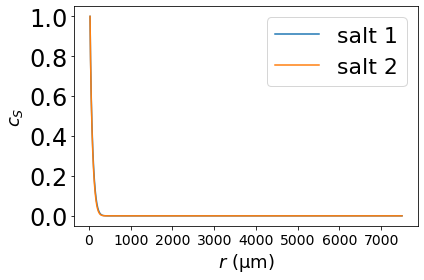

In [4]:

def integrating_salt(c):
    total_inside=2.0*np.pi*Rmin**2*c_beacon
    total_outside=0.0
    for i in range(0,Nr):
        total_outside=total_outside+2.0*np.pi*r_circ[i]*c[i]*dr
    ratio_out_to_in=total_outside/total_inside
    return ratio_out_to_in

print('now generating circular profile for salt 1')
print('distance diffused in time ',tmax,' is ',np.sqrt(D_s1*tmax)/1.0e-6,' um')

c_circ_s1=circ_sym_diff(D_s1)
s1_ratio_out_to_in=integrating_salt(c_circ_s1)
print('ratio total salt 1 outside beacon 1',s1_ratio_out_to_in)
#
print('now generating circular profile for salt 2')
c_circ_s2=circ_sym_diff(D_s2)
s2_ratio_out_to_in=integrating_salt(c_circ_s2)
print('ratio total salt 1 outside beacon 2',s2_ratio_out_to_in)
#

plt.plot(r_circ*1.0e6,c_circ_s1,label='salt 1')
plt.plot(r_circ*1.0e6,c_circ_s2,label='salt 2')
plt.legend(fontsize=22)

plt.xlabel('$r$ ($\mathrm{\mu}$m)',fontsize=18)
plt.ylabel('$c_S$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)
#plt.title('total salt conc./beacon salt conc.',fontsize=26)
plt.tight_layout()
plt.show()

We need to define a function to interpolate the discretised concentration profiles of the beacons that are a function of a radial coordinate, in order to obtain values on our Cartesian grid. 

In [5]:
def c_viar_interp(r,c_s):
    if(r<Rmin):
        c=c_beacon
    else:
        i_min=np.argmin(abs(r_circ-r))
        if(r_circ[i_min]<r):
            i_below=i_min
            i_above=i_min+1
        else:
            i_below=i_min-1
            i_above=i_min
#
        r_below=r_circ[i_below]
        r_above=r_circ[i_above]
#
        c=(c_s[i_above]*(r-r_below)+c_s[i_below]*(r_above-r))/(r_above-r_below)
#    print(r,i_min,r_below,r_above)
    return c

## Combine two radial salt profiles to obtain salt gradients on 2D Cartesian grid


Takes two radial profiles centred on the two beacons to computer salt concentrations etc on Nx by Ny grid in 2D. Note that background salt is assumed to be NaCl and is added in as well.

Uses radial profiles from two salt sources to calculate various moments of salt concentrations:

Total concentration (of two monovalent salts), to give ionic strength (needed for local DP)

$$
c_{T} = \sum_i c_i
$$

as well as

$$
g = \sum_i z_i D_i c_i
$$

which is a weighted sum of ion densities, $z_i=\pm1$ is the valence

$$
\sigma = \sum_i z_i^2 D_i c_i
$$

is the conductivity, $\varrho=1/\sigma$

$\sigma$ has units from $D$ as we take $e=1$ and beacon salt concentration to also be one. Thus conductivity $\sigma$ has units of m $^2$/s. $\rho$ has units of s/m $^2$. Source $S$ has units of 1/m $^2$ due to the two gradients.

Note that we also need some properties at spacings half way between the Nx times Ny grid points.

In [6]:
def calc_c_totalsalt(c_circ_s1,c_circ_s2):
    c_totalsalt=np.zeros((Nx,Ny))
    c_s1arr=np.zeros((Nx,Ny))
    c_s2arr=np.zeros((Nx,Ny))
    sigma=np.zeros((Nx,Ny))
    for ix in range(0,Nx):
        for iy in range(0,Ny):
            r_s1=np.sqrt((x[ix,iy]-x_s1)**2+y[ix,iy]**2)
            r_s2=np.sqrt((x[ix,iy]-x_s2)**2+y[ix,iy]**2)
            c_s1arr[ix,iy]=c_viar_interp(r_s1,c_circ_s1)
            c_s2arr[ix,iy]=c_viar_interp(r_s2,c_circ_s2)
            c_totalsalt[ix,iy]=2.0*(c_back_salt+c_s1arr[ix,iy]+c_s2arr[ix,iy])
            sigma[ix,iy]=(D_Na+D_Cl)*c_back_salt+(D_Na+D_Cl)*c_s1arr[ix,iy]+(D_K+D_OAc)*c_s2arr[ix,iy]
    rho=1.0/sigma
# now offset values
    rho_half=np.zeros((twoNx,twoNy))
    g_half=np.zeros((twoNx,twoNy))
    c_totalsalthalf=np.zeros((twoNx,twoNy))
    for ix in range(0,twoNx):
        for iy in range(0,twoNy):
            r_s1_half=np.sqrt((x_half[ix,iy]-x_s1)**2+y_half[ix,iy]**2)
            r_s2_half=np.sqrt((x_half[ix,iy]-x_s2)**2+y_half[ix,iy]**2)
            c_s1=c_viar_interp(r_s1_half,c_circ_s1)
            c_s2=c_viar_interp(r_s2_half,c_circ_s2)
            sigma_half=(D_Na+D_Cl)*c_back_salt+(D_Na+D_Cl)*c_s1+(D_K+D_OAc)*c_s2
            rho_half[ix,iy]=1.0/sigma_half
            g_half[ix,iy]=(D_Na-D_Cl)*c_back_salt+(D_Na-D_Cl)*c_s1+(D_K-D_OAc)*c_s2
            c_totalsalthalf[ix,iy]=2.0*(c_back_salt+c_s1+c_s2)
#
    return c_totalsalt,c_totalsalthalf,sigma,rho,rho_half,g_half,c_s1arr,c_s2arr

## Compute source pseudo-scalar $S$

Now that we have $\varrho$ and $g$ we define functions to compute gradients in them, and hence the (in 2D) cross product of their derivatives, which is our source term $S$.

Equation is

\begin{equation}
\nabla\times\left(\varrho\mathbf{I}\right)=
\nabla g\times\nabla\varrho = \mathbf{S}
\end{equation}
which defines the source $\mathbf{S}$

We also compute gradients in the salt concentration, that are needed to compute the conventional DP term

In [7]:
def computeSource(rho_half,g_half,c_totalsalthalf):
# first compute rho_x and rho_y, g_x and g_y
    rho_x=np.zeros((Nx,Ny))
    rho_y=np.zeros((Nx,Ny))
    g_x=np.zeros((Nx,Ny))
    g_y=np.zeros((Nx,Ny))
    c_totalsalt_x=np.zeros((Nx,Ny))
    c_totalsalt_y=np.zeros((Nx,Ny))
#
    for ix in range(0,Nx):
        for iy in range(0,Ny):
            twoix=2*ix
            twoiy=2*iy
            rho_x[ix,iy]=(rho_half[twoix+2,twoiy+1]-rho_half[twoix,twoiy+1])/dx
            rho_y[ix,iy]=(rho_half[twoix+1,twoiy+2]-rho_half[twoix+1,twoiy])/dy
            g_x[ix,iy]=(g_half[twoix+2,twoiy+1]-g_half[twoix,twoiy+1])/dx
            g_y[ix,iy]=(g_half[twoix+1,twoiy+2]-g_half[twoix+1,twoiy])/dy
            c_totalsalt_x[ix,iy]=(c_totalsalthalf[twoix+2,twoiy+1]-c_totalsalthalf[twoix,twoiy+1])/dx
            c_totalsalt_y[ix,iy]=(c_totalsalthalf[twoix+1,twoiy+2]-c_totalsalthalf[twoix+1,twoiy])/dy
# compute Source
    Source=g_x*rho_y-g_y*rho_x
    return Source,g_x,g_y,c_totalsalt_x,c_totalsalt_y,rho_x,rho_y

Now call functions to compute salt profiles, and then the source term $S$

In [8]:
print('salt sources ',round(sources_sep/1.0e-6,1),' um apart')

Nx=800
Ny=800

x=np.zeros((Nx,Ny))
y=np.zeros((Nx,Ny))
Lx=4.0e-3
Ly=4.0e-3
dx=Lx/(Nx-1.0)
dy=Ly/(Ny-1.0)
print('step sizes along x and y ',round(dx*1.0e6,3),round(dy*1.0e6,3),' um')
print('note code that computes A needs dx and dy to be the same!')

for ix in range(0,Nx):
    for iy in range(0,Ny):
        x[ix,iy]=-0.5*Lx+float(ix)*dx
        y[ix,iy]=-0.5*Ly+float(iy)*dy
print('smallest and largest values of x ',x[0,0]*1.0e6,x[Nx-1,0]*1.0e6,' um')

#
twoNx=2*Nx+1
twoNy=2*Ny+1
x_half=np.zeros((twoNx,twoNy))
y_half=np.zeros((twoNx,twoNy))
for ix in range(0,twoNx):
    for iy in range(0,twoNy):
        x_half[ix,iy]=-0.5*Lx+float(ix-1)*0.5*dx
        y_half[ix,iy]=-0.5*Ly+float(iy-1)*0.5*dy
print('smallest and largest values of x_half ',x_half[0,0]*1.0e6,x_half[twoNx-1,0]*1.0e6,' um')
    
#
print('computing total ionic strength, sigma and rho (inc on half lattice)')
c_totalsalt,c_totalsalthalf,sigma,rho,rho_half,g_half,c_salt1,c_salt2= \
   calc_c_totalsalt(c_circ_s1,c_circ_s2)
print('computing Source')
Source,g_x,g_y,c_totalsalt_x,c_totalsalt_y,rho_x,rho_y= \
   computeSource(rho_half,g_half,c_totalsalthalf)



salt sources  200.0  um apart
step sizes along x and y  5.006 5.006  um
note code that computes A needs dx and dy to be the same!
smallest and largest values of x  -2000.0 2000.0  um
smallest and largest values of x_half  -2002.503128911139 2002.503128911139  um
computing total ionic strength, sigma and rho (inc on half lattice)
computing Source


diffusion from sources for  4.0  s


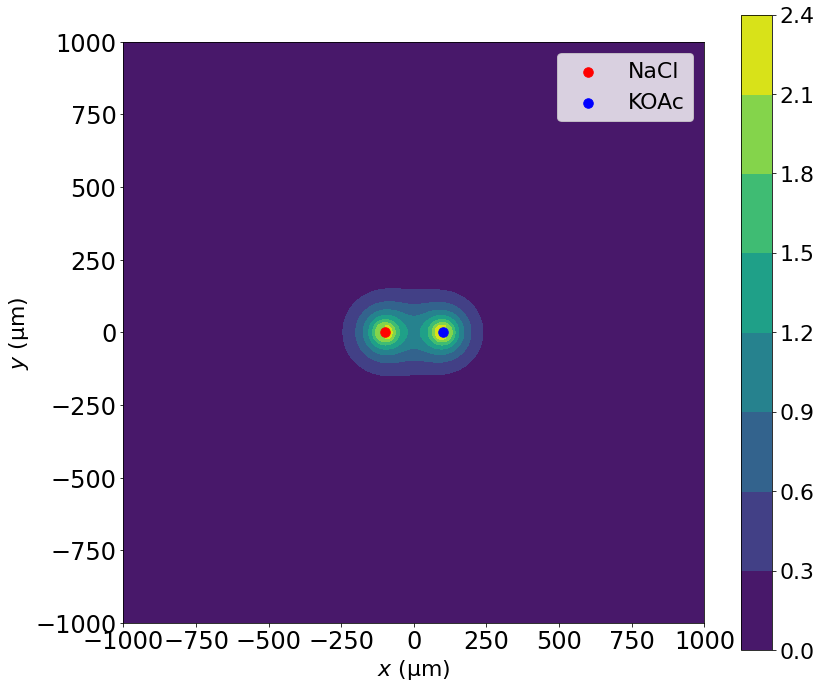

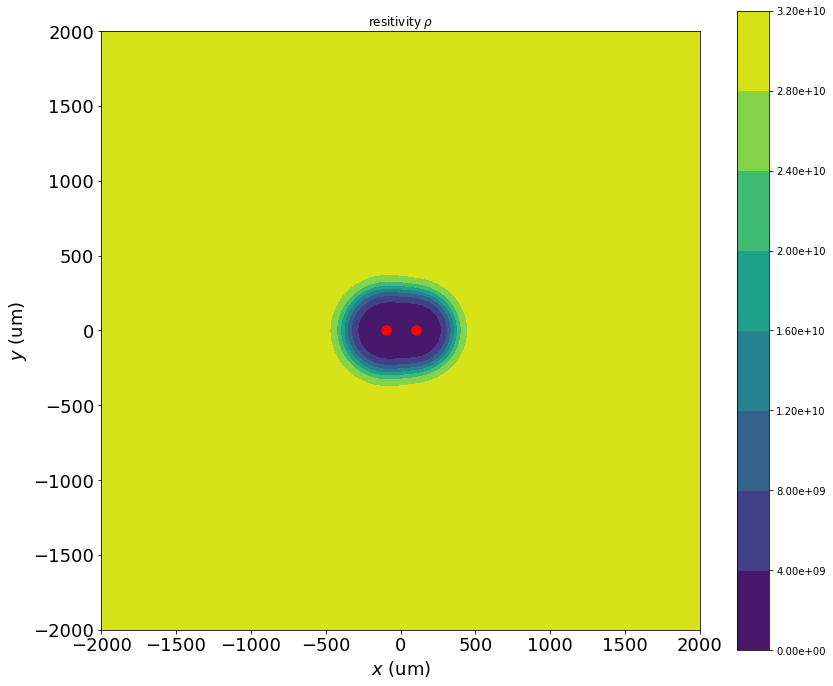

max conductivity  1.3770785796030713  A/Vm
min conductivity  0.0129024  A/Vm


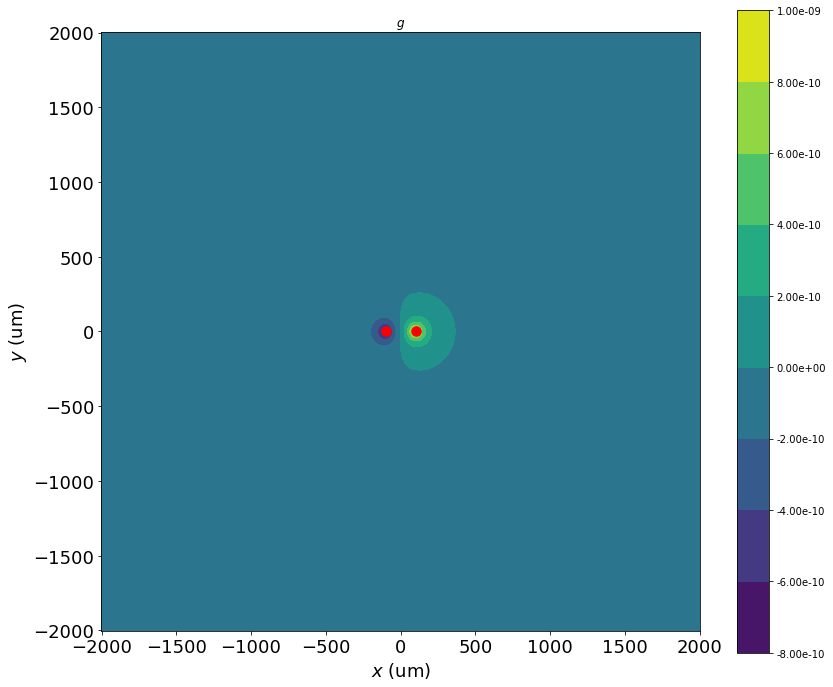

In [9]:
xlim_max=1000

print('diffusion from sources for ',tmax,' s')

label_fontsize=22

plt.figure(figsize=(12,10))
plt.axes().set_aspect('equal')
plt.contourf(x/1.0e-6,y/1.0e-6,c_totalsalt)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=label_fontsize)
plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl')
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc')
plt.legend(fontsize=22)

#plt.plot([ix_salt1,ix_salt2],[iy_salt1,iy_salt2],lw=2,color='black',ls=':')
#plt.plot([ix_salt1,ix_salt1],[iy_salt1-3,iy_salt1+3],lw=2,color='black',ls=':')
#plt.plot([ix_salt2,ix_salt2],[iy_salt2-3,iy_salt2+3],lw=2,color='black',ls=':')
#c_ss = c_beacon - c_beacon*np.log(r/Rmin)/np.log(Rmax/Rmin)
#plt.plot(r/1.0e-6,c_ss,lw=4,ls=':',label='an. ss')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.title('total salt conc./beacon salt conc.',fontsize=26)
plt.tight_layout()
plt.savefig('saltconc.pdf')
plt.show()
#

plt.figure(figsize=(12,10))
plt.axes().set_aspect('equal')
plt.contourf(x/1.0e-6,y/1.0e-6,rho)
plt.colorbar(format="%6.2e")
plt.scatter(np.array([x_s1,x_s2])/1.0e-6,[0.0,0.0],s=90,color='red')
#c_ss = c_beacon - c_beacon*np.log(r/Rmin)/np.log(Rmax/Rmin)
#plt.plot(r/1.0e-6,c_ss,lw=4,ls=':',label='an. ss')
plt.xlabel('$x$ (um)',fontsize=18)
plt.ylabel('$y$ (um)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend()
plt.title('resitivity $\\rho$')
plt.tight_layout()
plt
plt.show()
#

kT=4e-21
q_e=1.6e-19
c_saltSI=6.0e25

sigma_units_fac=(q_e**2/kT)*c_saltSI

print('max conductivity ',np.amax(sigma)*sigma_units_fac,' A/Vm')
print('min conductivity ',np.amin(sigma)*sigma_units_fac,' A/Vm')



plt.figure(figsize=(12,10))
plt.axes().set_aspect('equal')
plt.contourf(x_half/1.0e-6,y_half/1.0e-6,g_half)
plt.colorbar(format="%6.2e")
plt.scatter(np.array([x_s1,x_s2])/1.0e-6,[0.0,0.0],s=90,color='red')
#c_ss = c_beacon - c_beacon*np.log(r/Rmin)/np.log(Rmax/Rmin)
#plt.plot(r/1.0e-6,c_ss,lw=4,ls=':',label='an. ss')
plt.xlabel('$x$ (um)',fontsize=18)
plt.ylabel('$y$ (um)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend()
plt.title('$g$')
plt.tight_layout()
plt.show()
#

<ipython-input-10-975f070a8dab>:4: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(g_x**2+g_y**2),levels,locator=ticker.LogLocator(), \


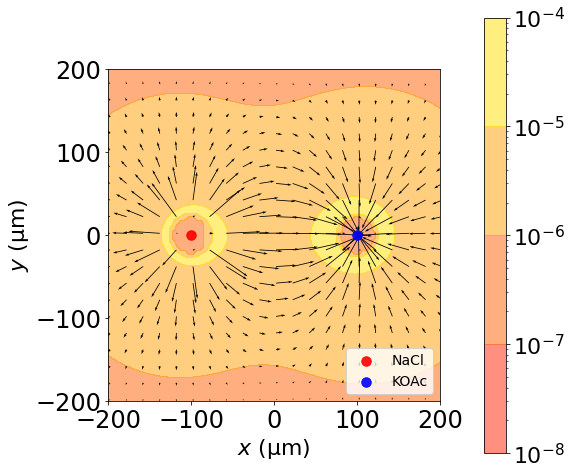

In [10]:
plt.figure(figsize=(8,7))

levels=[1e-8,1e-7,1e-6,1e-5,1e-4]
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(g_x**2+g_y**2),levels,locator=ticker.LogLocator(), \
             alpha=0.5,cmap='autumn')
plt.gca().set_aspect('equal')
cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)

n_coarse=4
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           g_x[::n_coarse,::n_coarse],g_y[::n_coarse,::n_coarse],angles='xy',scale=0.0001)

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
#plt.title('$E$ units ?')
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-200,-100,0,100,200],fontsize=24)
plt.yticks([-200,-100,0,100,200],fontsize=24)
#plt.title('$E$ units 1/m')
xlim=200
plt.xlim([-xlim,xlim])
plt.ylim([-xlim,xlim])
plt.tight_layout()
#plt.savefig('E.pdf')
plt.show()
print('max element in nabla g ',np.amax(np.sqrt(g_x**2+g_y**2)),' m/s')

max element in nabla g  1.840847699971339e-05  m/s


<ipython-input-11-df1d91a7b726>:4: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(rho_x**2+rho_y**2),levels,locator=ticker.LogLocator(), \


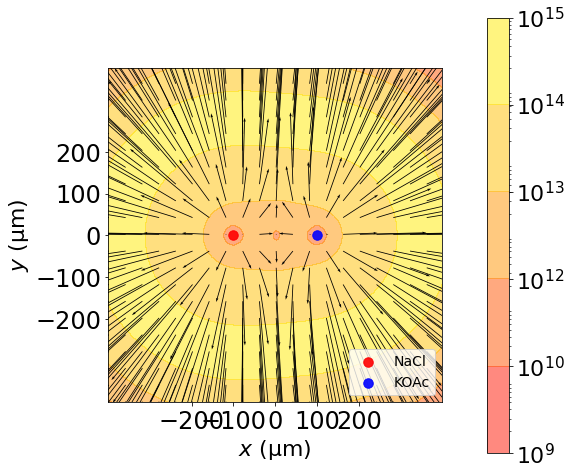

max element in nabla rho  195995875105870.06  s/m^3
min element in nabla rho  0.0  s/m^3


In [11]:
plt.figure(figsize=(8,7))

levels=[1e9,1e10,1e12,1e13,1e14,1e15]
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(rho_x**2+rho_y**2),levels,locator=ticker.LogLocator(), \
             alpha=0.5,cmap='autumn')
plt.gca().set_aspect('equal')
cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)

n_coarse=8
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           rho_x[::n_coarse,::n_coarse],rho_y[::n_coarse,::n_coarse], \
           angles='xy',scale=1.0e14)

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
#plt.title('$E$ units ?')
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-200,-100,0,100,200],fontsize=24)
plt.yticks([-200,-100,0,100,200],fontsize=24)
#plt.title('$E$ units 1/m')
xlim=400
plt.xlim([-xlim,xlim])
plt.ylim([-xlim,xlim])
plt.tight_layout()
#plt.savefig('E.pdf')
plt.show()
print('max element in nabla rho ',np.amax(np.sqrt(rho_x**2+rho_y**2)),' s/m^3')
print('min element in nabla rho ',np.amin(np.sqrt(rho_x**2+rho_y**2)),' s/m^3')

diffusion from sources for  4.0  s
max element in Source array at x  1.2515644555694677e-05  and y   0.00013767209011264102 3.8887106968012256e-05  1/um^2
min element in Source array at x  1.2515644555694677e-05  and y   -0.0001376720901126408


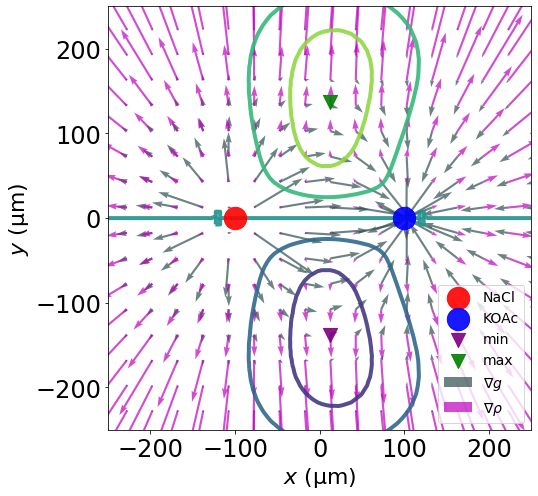

In [12]:
print('diffusion from sources for ',tmax,' s')

max_vec_pos=np.unravel_index(Source.argmax(), Source.shape)
x_max=x[max_vec_pos[0],max_vec_pos[1]]
y_max=y[max_vec_pos[0],max_vec_pos[1]]
print('max element in Source array at x ',x_max,' and y  ',y_max, \
      np.amax(Source/1.0e12),' 1/um^2')
min_vec_pos=np.unravel_index(Source.argmin(), Source.shape)
x_min=x[min_vec_pos[0],min_vec_pos[1]]
y_min=y[min_vec_pos[0],min_vec_pos[1]]

print('min element in Source array at x ',x_min,' and y  ',y_min)


plt.figure(figsize=(8,7))
plt.gca().set_aspect('equal')

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=500,color='red',label='NaCl',alpha=0.9,zorder=99)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=500,color='blue',label='KOAc',alpha=0.9,zorder=99)
plt.scatter(x_min*1.0e6,y_min*1.0e6,s=200,color='purple',label='min',alpha=0.9,marker='v',zorder=99)
plt.scatter(x_max*1.0e6,y_max*1.0e6,s=200,color='green',label='max',alpha=0.9,marker='v',zorder=99)
#plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='NaCl',alpha=0.9)

num_colourlevels=6
cp=plt.contour(x/1.0e-6,y/1.0e-6,Source/1.0e08,num_colourlevels,alpha=0.9, \
               linewidths=4,cmap=plt.cm.viridis)
#plt.clabel(cp,inline=True,fontsize=20)

n_coarse=6
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           g_x[::n_coarse,::n_coarse],g_y[::n_coarse,::n_coarse], \
           angles='xy',scale=0.00008,color='darkslategrey',label='$\\nabla g$',width=0.005,alpha=0.7)

n_coarse=6
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           rho_x[::n_coarse,::n_coarse],rho_y[::n_coarse,::n_coarse], \
           angles='xy',scale=5.0e14,color='m',label='$\\nabla\\rho$',width=0.005,alpha=0.7)


#plt.title('$E$ units ?')
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-200,-100,0,100,200],fontsize=24)
plt.yticks([-200,-100,0,100,200],fontsize=24)
#plt.title('$E$ units 1/m')
xlim=250
plt.xlim([-xlim,xlim])
plt.ylim([-xlim,xlim])
plt.tight_layout()
plt.savefig('Source.pdf')
plt.show()

Now plot source strength $S$

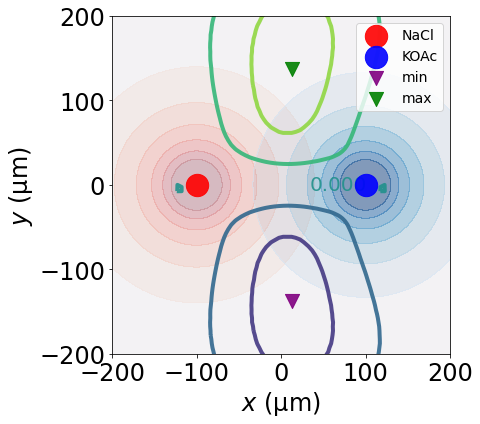

In [13]:

plt.figure(figsize=(7,6))
plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=500,color='red',label='NaCl',alpha=0.9,zorder=99)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=500,color='blue',label='KOAc',alpha=0.9,zorder=99)
plt.scatter(x_min*1.0e6,y_min*1.0e6,s=200,color='purple',label='min',alpha=0.9,marker='v',zorder=99)
plt.scatter(x_max*1.0e6,y_max*1.0e6,s=200,color='green',label='max',alpha=0.9,marker='v',zorder=99)


num_colourlevels=6
cp=plt.contour(x/1.0e-6,y/1.0e-6,Source/1.0e08,num_colourlevels,alpha=0.9,linewidths=4)#,cmap=plt.cm.viridis)
plt.clabel(cp,inline=True,fontsize=20)



plt.contourf(x/1.0e-6,y/1.0e-6,c_salt1,alpha=0.5,cmap='Reds')
plt.contourf(x/1.0e-6,y/1.0e-6,c_salt2,alpha=0.5,cmap='Blues')
plt.gca().set_aspect('equal')
plt.clabel(cp,inline=True,fontsize=20)

plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=24)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=24)
plt.xticks([-200,-100,0,100,200],fontsize=24)
plt.yticks([-200,-100,0,100,200],fontsize=24)
xlim=200
plt.xlim([-xlim,xlim])
plt.ylim([-xlim,xlim])
plt.legend(fontsize=14)
#plt.title('Source $\\nabla g \\times\\nabla\\rho$ units 1/m$^2$')
plt.tight_layout()
#plt.savefig('Source.pdf')
plt.show()
#


Estimate strength of source, as 1st moment 

In [14]:
moment_Source=np.sum(y*Source)*dx*dy
print('first moment along y of Source strength ',moment_Source*1.0e6, ' um at ratio ',1.0/c_back_salt)
moment_Source=np.sum(x*Source)*dx*dy
print('first moment along x of Source strength ',moment_Source*1.0e6, ' um at ratio ',1.0/c_back_salt)
mag_Source=np.sum(Source)*dx*dy
print('zeroth moment along y of Source strength ',mag_Source, ' 1/m^2 - due to symmetry should be almost 0')

first moment along y of Source strength  475.9086638892989  um at ratio  100.0
first moment along x of Source strength  1.0536042790045197e-13  um at ratio  100.0
zeroth moment along y of Source strength  2.161859296458964e-15  1/m^2 - due to symmetry should be almost 0


## Use source $S$ to compute scalar potential $A$ that in turn gives currents $\mathbf{I}$


Since the current is solenoidal ($\nabla\cdot\mathbf{I}=0$) we can write it as the curl of a vector potential $\mathbf{A}$,

\begin{equation}
\mathbf{I} = \nabla \times \mathbf{A}
\end{equation}

so that

\begin{equation}
\nabla\times\left[\varrho\,(\nabla \times \mathbf{A})\right] = \mathbf{S}
\end{equation}

### In 2D

\begin{equation}
 \frac{\partial }{\partial x}\Bigl(\varrho\frac{\partial A}{\partial x}\Bigr) +
  \frac{\partial }{\partial y}\Bigl(\varrho\frac{\partial A}{\partial y}\Bigr)+S=0
\end{equation}

Discretise this for Gauss-Seidel iteration (assumes ${\rm d}x={\rm d}y$)

\begin{equation}
\varrho(i+½, j) [A(i+1, j) − A(i, j)] − \varrho(i−½, j) [A(i, j) − A(i−1, j)] + \varrho(i, j+½) [A(i, j+1) − A(i, j)] − \varrho(i, j−½) [A(i, j) − A(i, j−1)] + S(i, j){\rm d}x^2= 0 
\end{equation}

or

\begin{equation}
\varrho(i+½, j) A(i+1, j) + \varrho(i−½, j) A(i−1, j)] + \varrho(i, j+½) A(i, j+1) + \varrho(i, j−½)  A(i, j−1) + S(i, j){\rm d}x^2= A(i,j)
\left[\varrho(i+½, j)+\varrho(i−½, j)+\varrho(i, j+½)+\varrho(i, j−½)\right]
\end{equation}

which can be written in the form of $A(i,j)=...$ which is what Gauss-Seidel needs.

Now define function to iterate to find vector potential $A(x,y)$ and then define another function to calculate current $\mathbf{I}=(I_x,I_y)\nabla\times\mathbf{A}$

NB vector potential $A$ has same units as $\sigma$ here, i.e., m$^2$/s and so as our current is derivative of $A$ it has the units of a speed m/s. Electric field $\mathbf{E}=\rho\mathbf{I}$ and so has units of 1/m. To convert to SI V/m units need to multiply by $kT/e$ - which has units of V.

Define functions to computer $A$ by iteration and then to obtain $\mathbf{I}$ from $A$ via numerical differentiation. Note that BCs are that scalar potential $A=0$ along all 4 edges of the grid.

In [15]:
def findA():
    n_iterate=4000
    omega=1.25
    A=np.zeros((Nx,Ny))
    for iterate in range(0,n_iterate):
# max_change
        max_change=0.0
        frac_max_change=0.0
# note edge values of A are not updated so remain 0
# note assumes dx and dy are equal to each other!
        for ix in range(1,Nx-1):
            for iy in range(1,Ny-1):
# for halfway points
                twoix=2*ix
                twoiy=2*iy
#      
                bottom=rho_half[twoix+2,twoiy+1]+rho_half[twoix,twoiy+1]+ \
                   rho_half[twoix+1,twoiy+2]+rho_half[twoix+1,twoiy]
                top=Source[ix,iy]*dx*dx+rho_half[twoix+2,twoiy+1]*A[ix+1,iy]+rho_half[twoix,twoiy+1]*A[ix-1,iy]+ \
                   rho_half[twoix+1,twoiy+2]*A[ix,iy+1]+rho_half[twoix+1,twoiy]*A[ix,iy-1]
                rhs=top/bottom
                oldA=A[ix,iy]
                A[ix,iy]=(1.0-omega)*oldA+omega*rhs
# check convergence
                if(iterate > 1000 and iterate%250 == 0):
                    if(abs(oldA-rhs)>max_change): max_change=abs(oldA-rhs)
                    if(abs((oldA-rhs)/oldA)>frac_max_change): frac_max_change=abs((oldA-rhs)/oldA)
# end loop over ix and iy
        if(iterate > 1000 and iterate%250 == 0):
            print('after ',iterate,' iterations max change and frac max change are ',max_change,frac_max_change)
        if(iterate==int(n_iterate/2)): Amid=np.copy(A)
#
    return A, Amid

#
def computeIfromA(A):
    I_x=np.zeros((Nx,Ny))
    I_y=np.zeros((Nx,Ny))
    for ix in range(1,Nx-1):
        for iy in range(1,Ny-1):
            I_x[ix,iy]=(A[ix,iy+1]-A[ix,iy-1])/(2.0*dx)
            I_y[ix,iy]=-(A[ix+1,iy]-A[ix-1,iy])/(2.0*dy)
    return I_x,I_y


Now call functions to computer currents

In [16]:
# time run
tstart = time.time()
#
A,Amid=findA()
tend = time.time()
print('runtime = ',round((tend-tstart)/60.0,1),' minutes')
if(abs(dx-dy) > 1.0e-12): print('eeeek! dx and dy must be the same!!')
I_x,I_y=computeIfromA(A)
#Imid_x,Imid_y=computeIfromA(Amid)



after  1250  iterations max change and frac max change are  4.702785607342261e-15 13.584404761609566
after  1500  iterations max change and frac max change are  3.5000022998118477e-15 5.042358476991705
after  1750  iterations max change and frac max change are  2.7946396301497e-15 3.4112111521891646
after  2000  iterations max change and frac max change are  2.333192639168005e-15 1.7464425809399617
after  2250  iterations max change and frac max change are  2.0028623027907595e-15 3.0426456657012704
after  2500  iterations max change and frac max change are  1.7522090818648722e-15 10.93355675468786
after  2750  iterations max change and frac max change are  1.5549280689387689e-15 28.36126834863699
after  3000  iterations max change and frac max change are  1.3952798928751788e-15 0.6085340463888663
after  3250  iterations max change and frac max change are  1.263347543868775e-15 4.586730349924865
after  3500  iterations max change and frac max change are  1.1523492131618034e-15 0.7423815

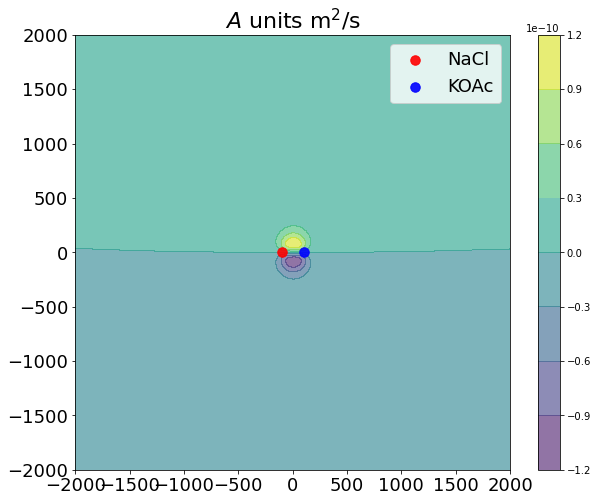

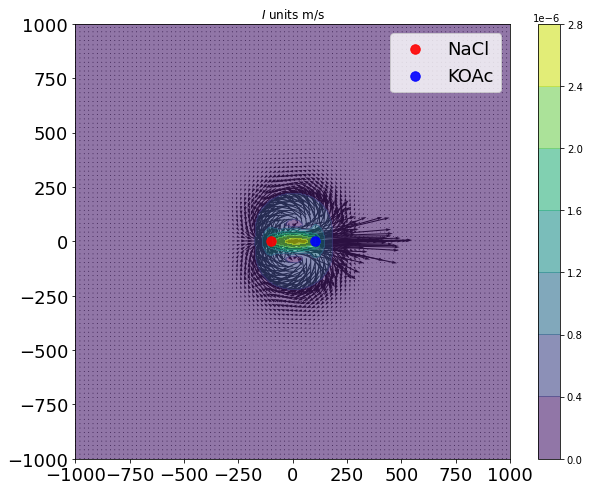

In [17]:
plt.figure(figsize=(10,8))
plt.contourf(x/1.0e-6,y/1.0e-6,A,alpha=0.6)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
plt.title('$A$ units m$^2$/s',fontsize=22)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()





n_coarse=4


# NB making scale number bigger makes arrows smaller!
plt.figure(figsize=(10,8))
plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           I_x[::n_coarse,::n_coarse],I_y[::n_coarse,::n_coarse],angles='xy',scale=0.00001)
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(I_x**2+I_y**2),alpha=0.6)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
plt.title('$I$ units m/s')
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
#




Now plot the electric field in units of V/m

diffusion from sources for  4.0  s
radius of beacon  25.000000000000004  um
separation of beacons  200.00000000000003  um
background salt is fraction of sources  0.01
max E field  161.68865822744388  V/m


<ipython-input-18-935407abc810>:17: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(E_x**2+E_y**2),levels,locator=ticker.LogLocator(), \


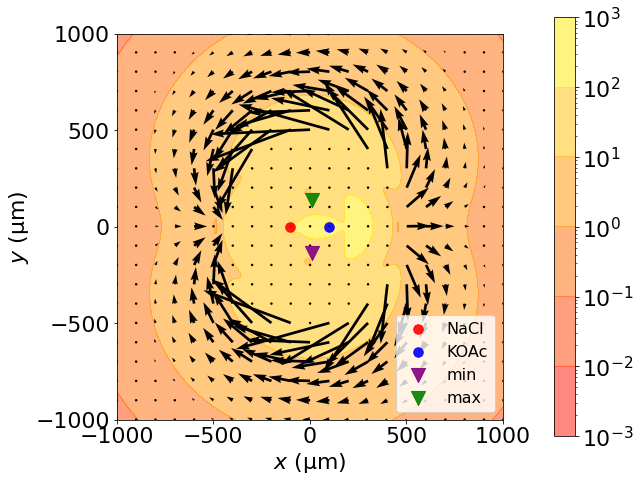

In [18]:
print('diffusion from sources for ',tmax,' s')
print('radius of beacon ',Rmin/1.0e-6,' um')
print('separation of beacons ',sources_sep/1.0e-6,' um')
print('background salt is fraction of sources ',c_back_salt)




kT_over_e=kT/q_e
E_x=rho*(I_x+g_x)*kT_over_e
E_y=rho*(I_y+g_y)*kT_over_e
xlim_max=1000
plt.figure(figsize=(9,7))
plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
levels=[0.001,0.01,0.1,1,10,100,1000]
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(E_x**2+E_y**2),levels,locator=ticker.LogLocator(), \
             alpha=0.5,cmap='autumn')
plt.gca().set_aspect('equal')
cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)

max_E=np.amax(np.sqrt(E_x**2+E_y**2))
print('max E field ',max_E,' V/m')

r_zero=5.0e-4
for ix in range(1,Nx-1):
    for iy in range(1,Ny-1):
        if(x[ix,iy]**2+y[ix,iy]**2 < r_zero**2):
#            print(x[ix,iy],y[ix,iy])
            E_x[ix,iy]=0.0
            E_y[ix,iy]=0.0


#
n_coarse=20
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           E_x[::n_coarse,::n_coarse],E_y[::n_coarse,::n_coarse],angles='xy',scale=90,width=0.007)

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
#plt.title('$E$ units ?')

plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
plt.yticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
#plt.title('$E$ units 1/m')
plt.scatter(x_min*1.0e6,y_min*1.0e6,s=200,color='purple',label='min',alpha=0.9,marker='v',zorder=99)
plt.scatter(x_max*1.0e6,y_max*1.0e6,s=200,color='green',label='max',alpha=0.9,marker='v',zorder=99)
plt.legend(fontsize=16,loc='lower right')
plt.tight_layout()
plt.savefig('E.pdf')
plt.show()

## Compute diffusiophoresis velocities

Computes DP using equation (5) from [Warren](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.124.248004):

$$
U_{DP} =  \frac{\epsilon}{\eta} \left( \frac{kT}{e} \right)^2\left[4 \ln \cosh \left( \frac{e \zeta}{4kT} \right) \nabla \ln \sum_i c_i 
  + \frac{e \zeta}{kT} \frac{\nabla g}{\sigma} + \frac{e \zeta}{kT} 
  \frac{\mathbf{I}}{\sigma} \right]
$$


The third term
$$
{\vec U}^{nonlocal}={\vec I}\rho\frac{kT}{e}\frac{\epsilon\zeta}{\eta}
$$
is the nonlocal DP velocity term, and it is proportional to the local current (NB current is zero in conventional DP).

First we compute the nonlocal term only, which is just proportional to the current and resistivity

In [19]:
epsilon_water=80.0*8.854e-12
zeta=-50.0e-3
print('zeta potential of colloid ',zeta*1.0e3,' mV')
viscosity=1.0e-3
colloid_mobility=epsilon_water*zeta/viscosity
print('colloid mobility ',colloid_mobility,' m2/s/V')

U_NL_x=I_x*rho*kT_over_e*colloid_mobility
U_NL_y=I_y*rho*kT_over_e*colloid_mobility
max_speed=np.amax(np.sqrt(U_NL_x**2+U_NL_y**2))
print('max NL speed of colloid ',max_speed/1.0e-6,' um/s')

zeta potential of colloid  -50.0  mV
colloid mobility  -3.5416e-08  m2/s/V
max NL speed of colloid  2.6711070778111736  um/s


First we plot the nonlocal (NL) term in DP velocity only

sources  200.00000000000003  um apart
source radius  25.000000000000004  um
ratio source/background concs  100.0
diffusion from sources for  4.0  s


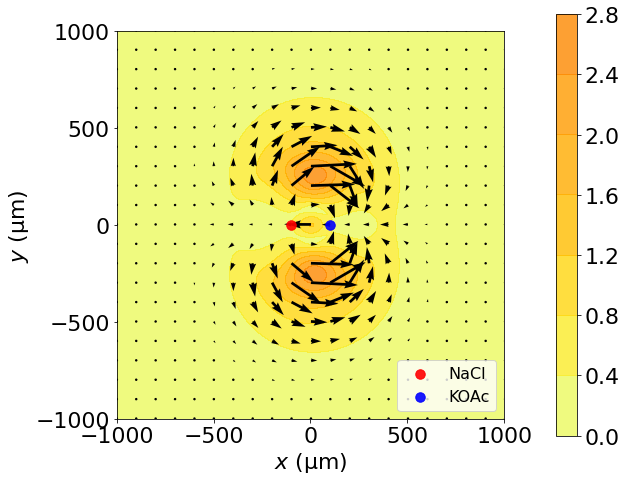

In [20]:
print('sources ',sources_sep/1.0e-6,' um apart')
print('source radius ',Rmin/1.0e-6,' um')
print('ratio source/background concs ',1.0/c_back_salt)
print('diffusion from sources for ',tmax,' s')


plt.figure(figsize=(9,7))
plt.gca().set_aspect('equal')
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(U_NL_x**2+U_NL_y**2)/1.0e-6,alpha=0.8,cmap='Wistia')

cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)

plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           U_NL_x[::n_coarse,::n_coarse], \
           U_NL_y[::n_coarse,::n_coarse],angles='xy',scale=0.00002,width=0.007)


stringy='Nonlocal colloid speed ($\mathrm{\mu}$m/s), t = '+str(round(tmax,2))+ \
' s dist diff.= '+str(round(np.sqrt(D_s1*tmax)/1.0e-6,0))+'$\mathrm{\mu}$m'
#plt.title(stringy,fontsize=23)

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
plt.legend(fontsize=16,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
plt.yticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
#plt.title('$E$ units 1/m')
plt.tight_layout()
plt.savefig('NL_speed.pdf')
plt.show()

Conventional diffusiophoresis is just the first two terms of equation above:

$$
U_{DP}^{conven. only} =  \frac{\epsilon}{\eta} \left( \frac{kT}{e} \right)^2\left[4 \ln \cosh \left( \frac{e \zeta}{4kT} \right) \nabla \ln \sum_i c_i 
  + \frac{e \zeta}{kT} \frac{\nabla g}{\sigma}  \right]
$$

In [21]:
prefactor=(epsilon_water/viscosity)*(kT_over_e)**2
cosh_coef=4.0*np.log(np.cosh(q_e*zeta/(4.0*kT)))
print('e*zeta/kT ',zeta/kT_over_e)
#
U_convenDP_x=prefactor*(cosh_coef*c_totalsalt_x/c_totalsalt+(zeta/kT_over_e)*g_x/sigma)
U_convenDP_y=prefactor*(cosh_coef*c_totalsalt_y/c_totalsalt+(zeta/kT_over_e)*g_y/sigma)

e*zeta/kT  -2.0000000000000004


Finally, we plot the ,ocal contribution to DP velocities and the total DP velocities

sources  200.0  um apart
source radius  25.000000000000004  um
ratio source/background concs  100.0
diffusion from sources for  4.0  s


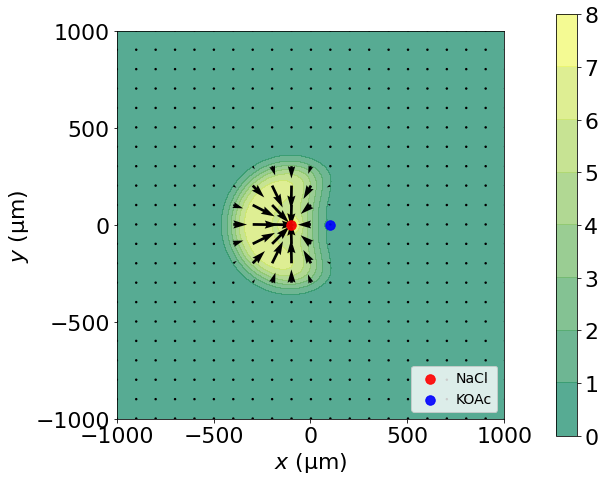

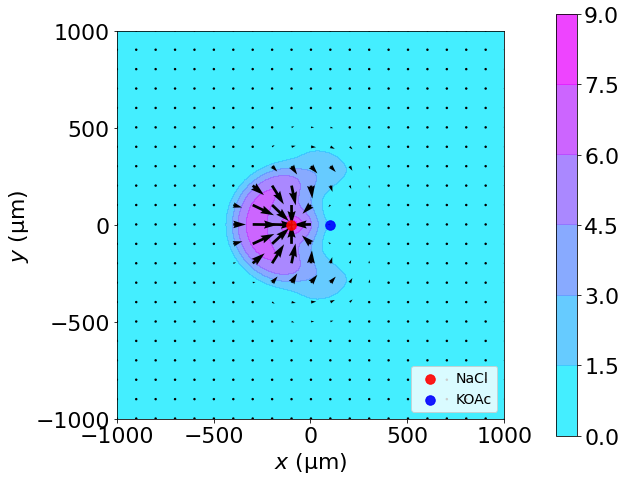

In [22]:
print('sources ',round(sources_sep/1.0e-6,1),' um apart')
print('source radius ',Rmin/1.0e-6,' um')
print('ratio source/background concs ',1.0/c_back_salt)
print('diffusion from sources for ',tmax,' s')


plt.figure(figsize=(9,7))
plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
plt.contourf(x/1.0e-6,y/1.0e-6,np.sqrt(U_convenDP_x[:,:]**2+U_convenDP_y[:,:]**2)/1.0e-6, \
             alpha=0.7,cmap='summer')
cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)



plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           U_convenDP_x[::n_coarse,::n_coarse], \
           U_convenDP_y[::n_coarse,::n_coarse],angles='xy',scale=0.0001,width=0.007)


plt.gca().set_aspect('equal')
stringy='LOCAL colloid speed ($\mathrm{\mu}$m/s) at t = '+str(round(tmax,2))+ \
' s dist diff.= '+str(round(np.sqrt(D_s1*tmax)/1.0e-6,0))+'$\mathrm{\mu}$m'
#plt.title(stringy,fontsize=24)

plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
plt.yticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
#plt.title('$E$ units 1/m')
plt.tight_layout()
plt.savefig('L_speed.pdf')
plt.show()
#
plt.figure(figsize=(9,7))
plt.xlim([-xlim_max,xlim_max])
plt.ylim([-xlim_max,xlim_max])
plt.contourf(x/1.0e-6,y/1.0e-6, \
             np.sqrt((U_NL_x+U_convenDP_x)**2+(U_NL_y+U_convenDP_y)**2)/1.0e-6, \
             alpha=0.8,cmap='cool')
cbar=plt.colorbar(pad=0.1)
cbar.ax.tick_params(labelsize=label_fontsize)

plt.quiver(x[::n_coarse,::n_coarse]/1.0e-6,y[::n_coarse,::n_coarse]/1.0e-6, \
           U_NL_x[::n_coarse,::n_coarse]+U_convenDP_x[::n_coarse,::n_coarse], \
           U_NL_y[::n_coarse,::n_coarse]+U_convenDP_y[::n_coarse,::n_coarse],angles='xy',scale=0.0001,width=0.007)

plt.gca().set_aspect('equal')
stringy='TOTAL colloid speed ($\mathrm{\mu}$m/s) at t = '+str(round(tmax,2))+ \
' s dist diff.= '+str(round(np.sqrt(D_s1*tmax)/1.0e-6,0))+'$\mathrm{\mu}$m'
#plt.title(stringy,fontsize=24)
plt.scatter(np.array([x_s1])/1.0e-6,[0.0],s=90,color='red',label='NaCl',alpha=0.9)
plt.scatter(np.array([x_s2])/1.0e-6,[0.0],s=90,color='blue',label='KOAc',alpha=0.9)
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('$x$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.ylabel('$y$ ($\mathrm{\mu}$m)',fontsize=label_fontsize)
plt.xticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
plt.yticks([-1000,-500,0,500,1000],fontsize=label_fontsize)
#plt.title('$E$ units 1/m')
plt.tight_layout()
plt.savefig('tot_speed.pdf')
plt.show()